# Training Models

## Linear Regression

### Normal equation  
teta_hat = (Xt X)-1 Xt y

In [2]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

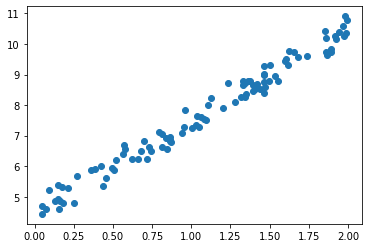

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [11]:
X_intercept = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
theta_best

array([[4.4828229 ],
       [2.99104688]])

The function that we plot is y = 4 + 3x1 + Gaussian Noise, so we would have hoped for theta0 = 4 and theta1 = 3

In [19]:
X_new = np.array([[0],[2]])
X_new_intercept = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_intercept.dot(theta_best)

In [20]:
y_pred

array([[ 4.4828229 ],
       [10.46491666]])

(0.0, 2.0, 0.0, 15.0)

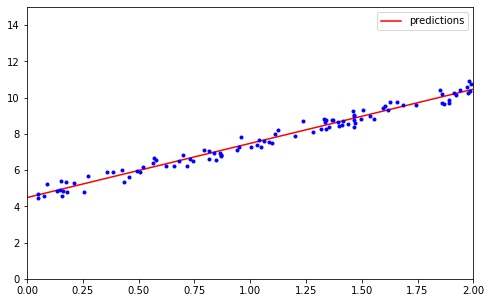

In [32]:
plt.figure(figsize=(8,5))
plt.plot(X_new, y_pred, 'r-',label='predictions')
plt.plot(X, y, "b.")
plt.legend()
plt.axis([0, 2, 0, 15])

Linear Regression using Scikit-learn

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)
print("Intercept: {}, Coeff:{}".format(lr_model.intercept_, lr_model.coef_)) # We find the same parameters as before
lr_model.predict(X_new)

Intercept: [4.4828229], Coeff:[[2.99104688]]


array([[ 4.4828229 ],
       [10.46491666]])

In [38]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=1e-6)
theta_best_svd

array([[4.4828229 ],
       [2.99104688]])

This function computes theta_hat = X+ y, where X+ is the *pseudoinverse* of X. 

In [41]:
np.linalg.pinv(X_intercept).dot(y)

array([[4.4828229 ],
       [2.99104688]])